In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine, load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
wine_dataset = load_wine()
X, y = pd.DataFrame(wine_dataset['data'], columns=wine_dataset['feature_names']), wine_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [33]:
dtc = DecisionTreeClassifier()
# dtc = DecisionTreeClassifier(criterion='entropy')

tree_model = dtc.fit(X_train, y_train)

In [35]:
from sklearn import tree
import graphviz
from graphviz import Source
from sklearn import tree

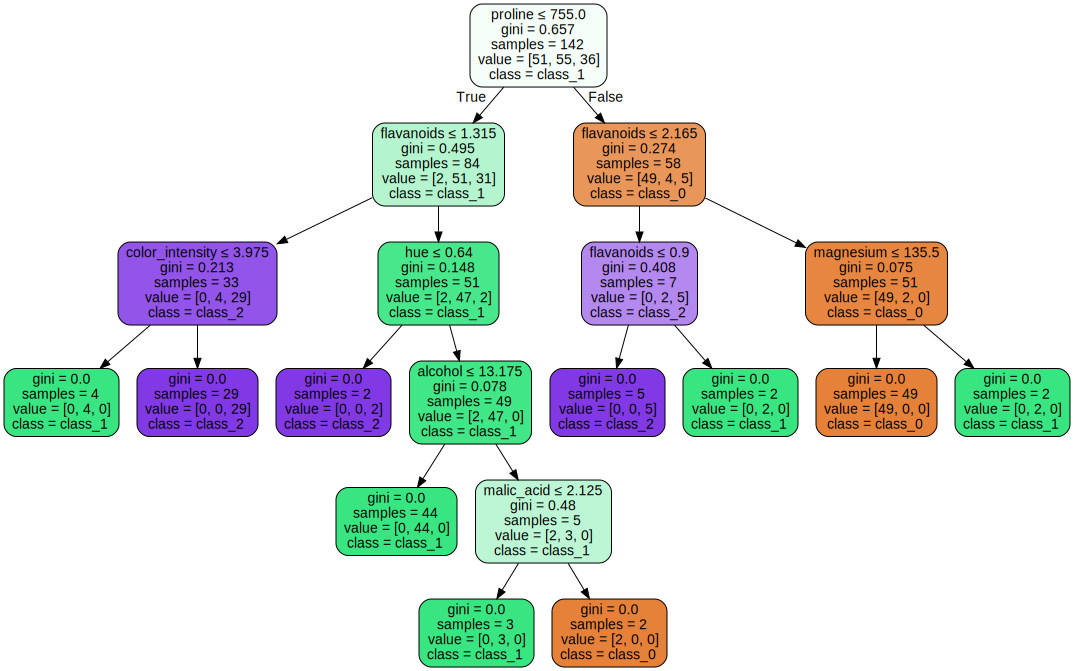

In [36]:
dot = tree.export_graphviz(tree_model, out_file=None, feature_names=wine_dataset.feature_names,
                        class_names=wine_dataset.target_names, filled=True,rounded=True, special_characters=True)
graphviz.Source(dot)

In [7]:
tree_pred = tree_model.predict(X_test)

accuracy = dtc.score(X_test, y_test)
accuracy

0.9444444444444444

При каждом запуске интерпретатор выбрает признаки случайным образом, поэтому результат каждый раз другой. По этой причине возьмем среднее значение, основываясь на 200 запусках.<br>

In [8]:
av_accuracy = 0
for i in range(200):
    dtc = DecisionTreeClassifier(max_features=2)
    tree_model = dtc.fit(X_train, y_train)
    tree_pred = tree_model.predict(X_test)

    accuracy = dtc.score(X_test, y_test)
    av_accuracy += accuracy
av_accuracy = av_accuracy / 200
av_accuracy

0.9162500000000006

Видно, что после задания максимального количества признаков точность предсказания в среднем снизилась.

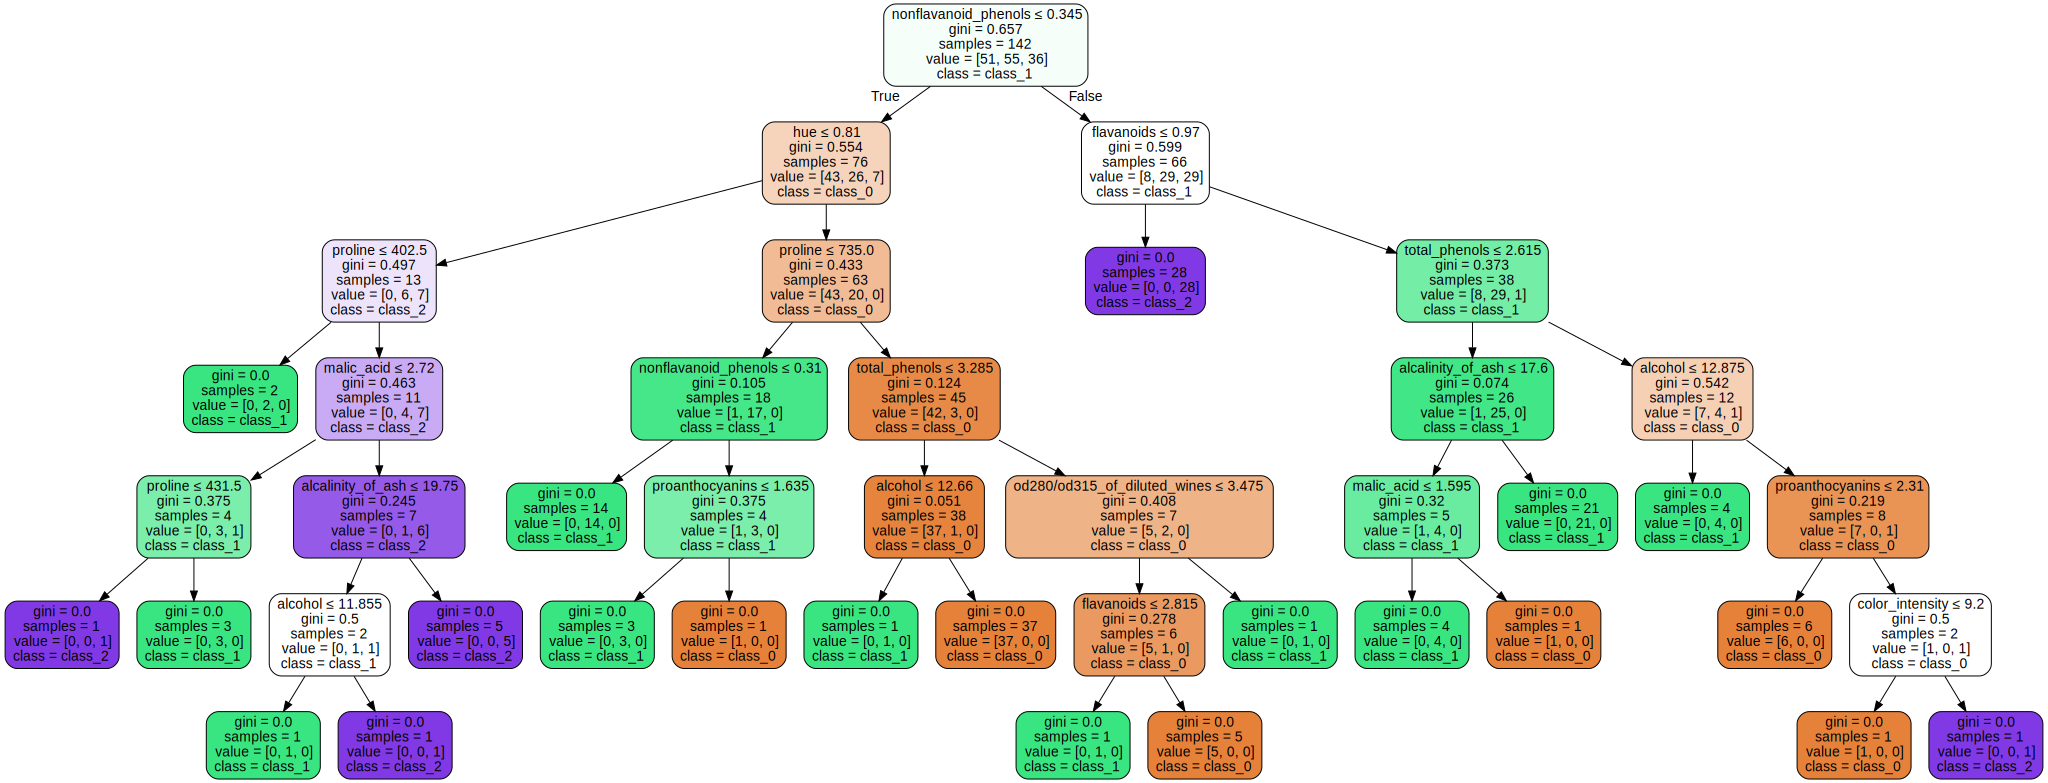

In [9]:
dot = tree.export_graphviz(tree_model, out_file=None, feature_names=wine_dataset.feature_names,
                        class_names=wine_dataset.target_names, filled=True,rounded=True, special_characters=True)
graphviz.Source(dot)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
cv_model = tree_grid.fit(X_train, y_train)
pars = tree_grid.best_params_

dtc = DecisionTreeClassifier(max_depth=pars['max_depth'], max_features=pars['max_features'])
model_dtc_2 = dtc.fit(X_train, y_train)
pred = model_dtc_2.predict(X_test)

accuracy_score(y_test, pred)

0.9722222222222222